### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata

def limpar_colunas(df):
    colunas_limpa = []
    for col in df.columns:
        # Remover acentos
        col = unicodedata.normalize('NFKD', col).encode('ASCII', 'ignore').decode('utf-8')
        # Tirar espaços extras e colocar em minúsculas
        col = col.strip().lower()
        # Substituir espaços por underline
        col = col.replace(' ', '_')
        colunas_limpa.append(col)
    df.columns = colunas_limpa
    return df

# Dicionário com URLs de cada loja
urls = {
    'Loja1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

# Carregando os dados com colunas limpas
dados_lojas = {nome: limpar_colunas(pd.read_csv(url)) for nome, url in urls.items()}

# Faturamento por loja
faturamentos = {loja: df['preco'].sum() for loja, df in dados_lojas.items()}

print("\nFaturamento por loja:")
for loja, valor in faturamentos.items():
    print(f"{loja}: R$ {valor:,.2f}")


Faturamento por loja:
Loja1: R$ 1,534,509.12
Loja2: R$ 1,488,459.06
Loja3: R$ 1,464,025.03
Loja4: R$ 1,384,497.58


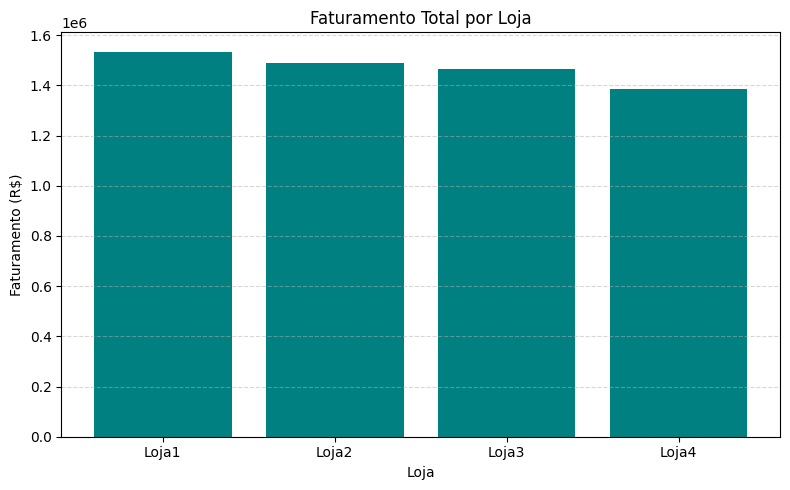

In [5]:
# Gráfico de faturamento
plt.figure(figsize=(8, 5))
plt.bar(faturamentos.keys(), faturamentos.values(), color='teal')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


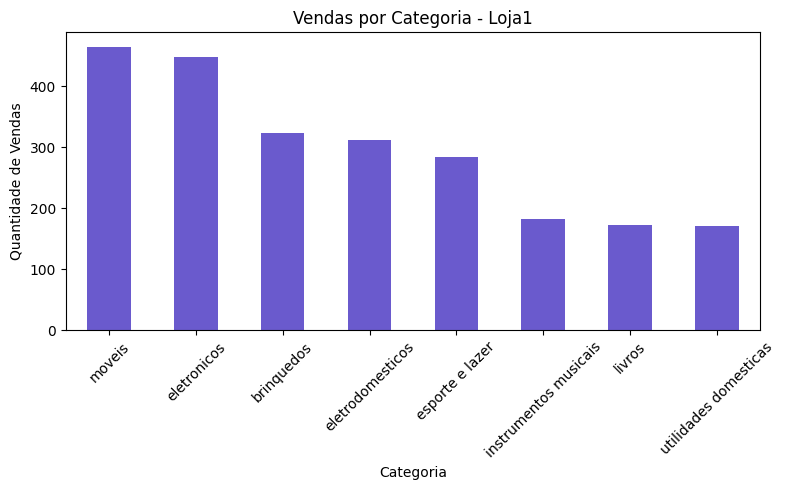

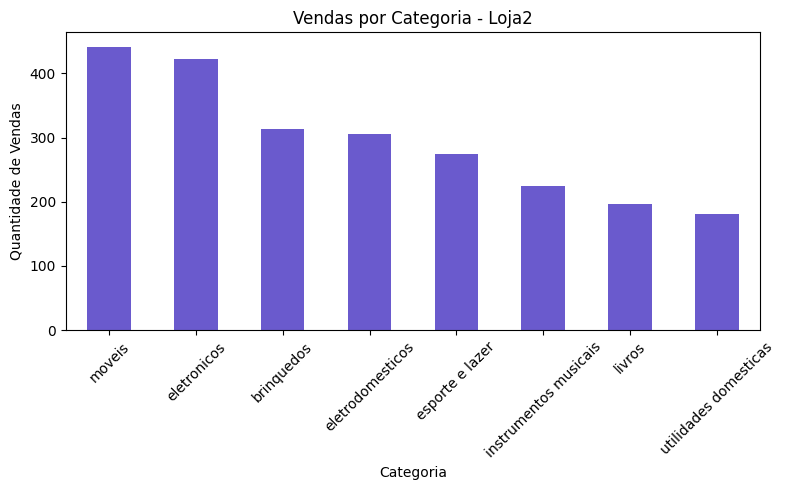

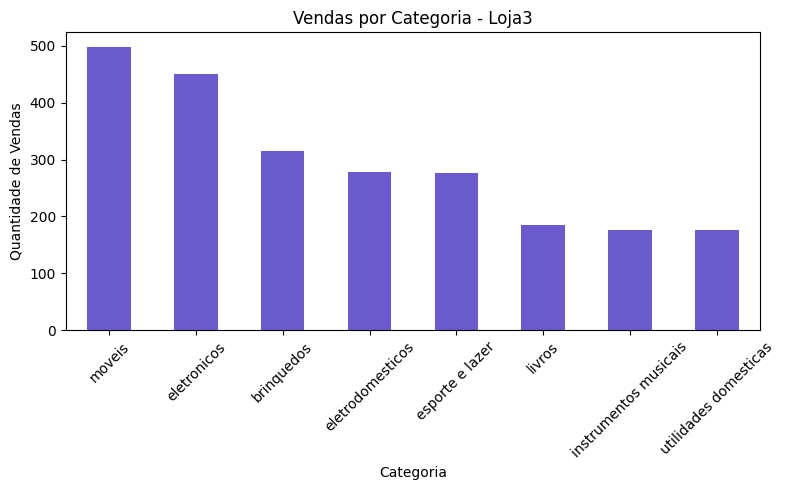

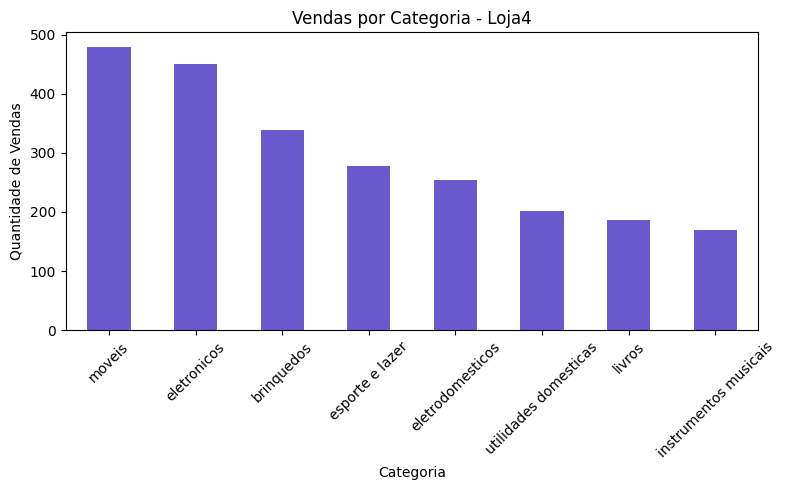

In [6]:
# Vendas por categoria
for loja, df in dados_lojas.items():
    if 'categoria_do_produto' in df.columns:
        categoria_counts = df['categoria_do_produto'].value_counts()
        plt.figure(figsize=(8, 5))
        categoria_counts.plot(kind='bar', color='slateblue')
        plt.title(f'Vendas por Categoria - {loja}')
        plt.xlabel('Categoria')
        plt.ylabel('Quantidade de Vendas')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"A loja {loja} não possui a coluna 'categoria_do_produto'")

# 3. Média de Avaliação das Lojas

In [7]:
# Média das avaliações
print("\nMédia das avaliações da compra por loja:")
avaliacoes_medias = {}
for loja, df in dados_lojas.items():
    if 'avaliacao_da_compra' in df.columns:
        media = df['avaliacao_da_compra'].mean()
        avaliacoes_medias[loja] = media
        print(f"{loja}: {media:.2f}")
    else:
        print(f"A loja {loja} não possui a coluna 'avaliacao_da_compra'")


Média das avaliações da compra por loja:
Loja1: 3.98
Loja2: 4.04
Loja3: 4.05
Loja4: 4.00


<ipython-input-8-1e0d2f393741>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avaliacoes_ordenadas.keys()), y=list(avaliacoes_ordenadas.values()), palette='viridis')


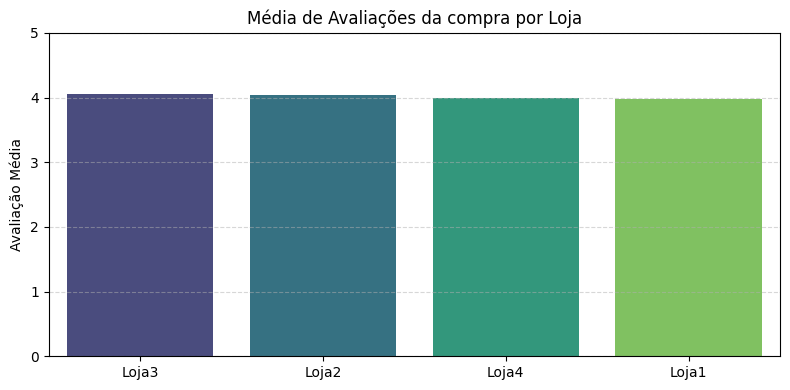

In [8]:
# Gráfico de médias de avaliação
if avaliacoes_medias:
    plt.figure(figsize=(8, 4))
    avaliacoes_ordenadas = dict(sorted(avaliacoes_medias.items(), key=lambda item: item[1], reverse=True))
    sns.barplot(x=list(avaliacoes_ordenadas.keys()), y=list(avaliacoes_ordenadas.values()), palette='viridis')
    plt.title("Média de Avaliações da compra por Loja")
    plt.ylabel("Avaliação Média")
    plt.ylim(0, 5)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 4. Produtos Mais e Menos Vendidos


Produtos mais e menos vendidos por loja:

🔹 Loja1
Produto mais vendido: Micro-ondas (Quantidade: 60)
Produto menos vendido: Headset (Quantidade: 33)


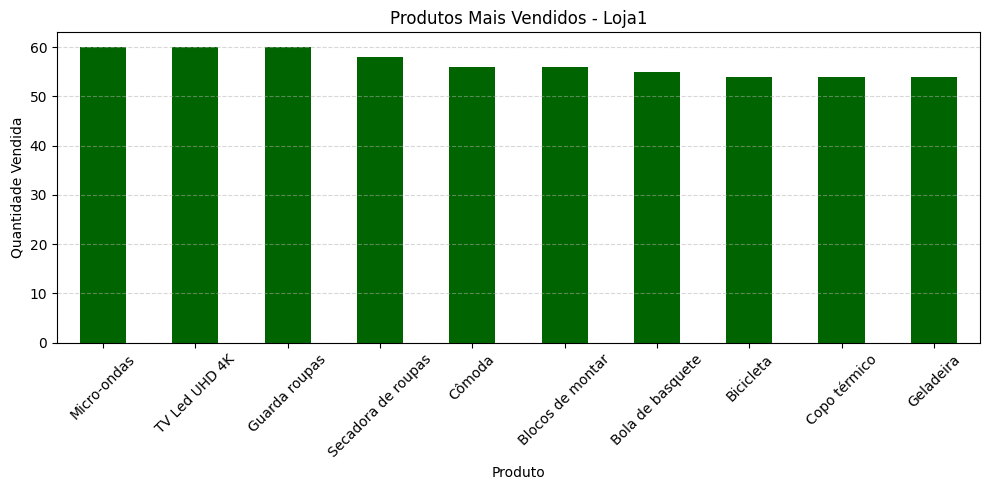

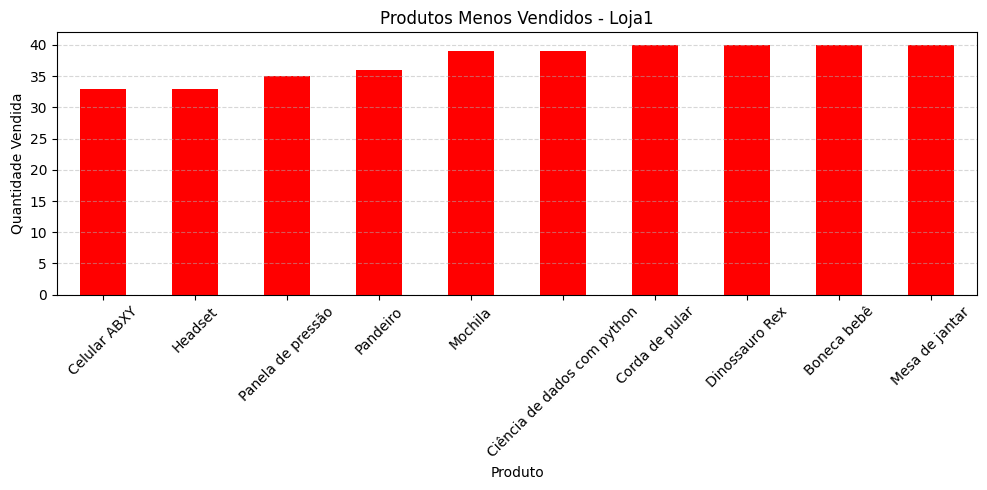


🔹 Loja2
Produto mais vendido: Iniciando em programação (Quantidade: 65)
Produto menos vendido: Jogo de tabuleiro (Quantidade: 32)


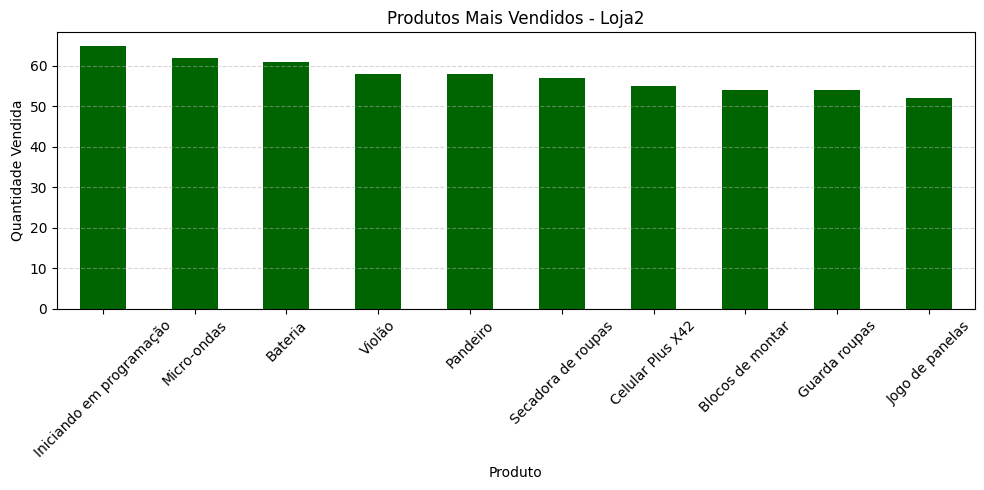

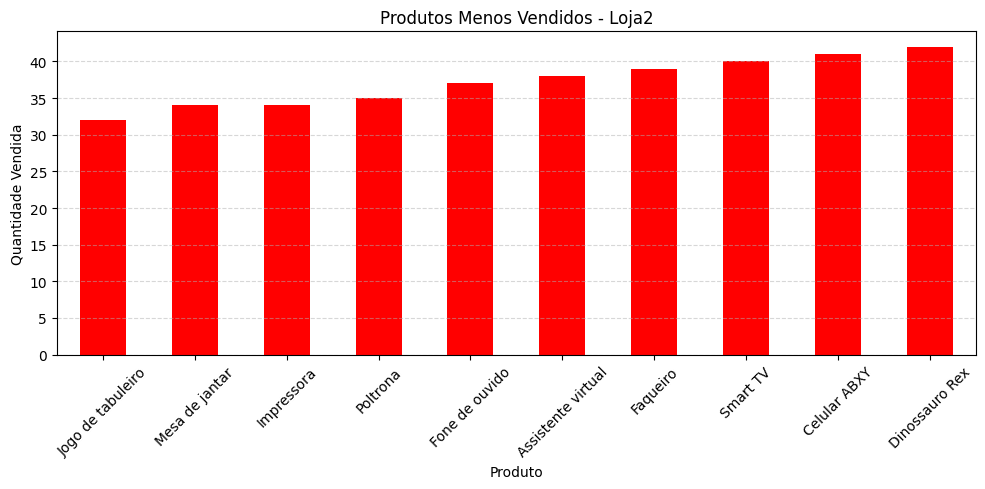


🔹 Loja3
Produto mais vendido: Kit banquetas (Quantidade: 57)
Produto menos vendido: Blocos de montar (Quantidade: 35)


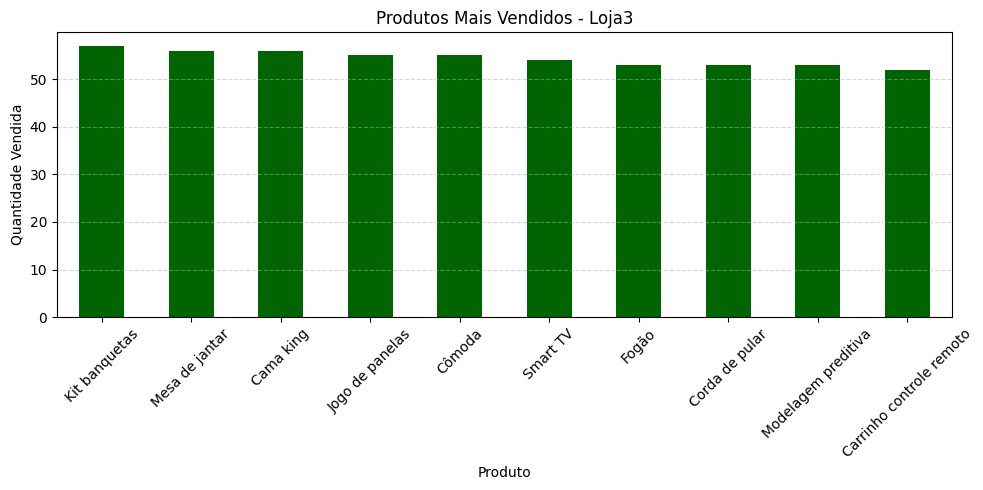

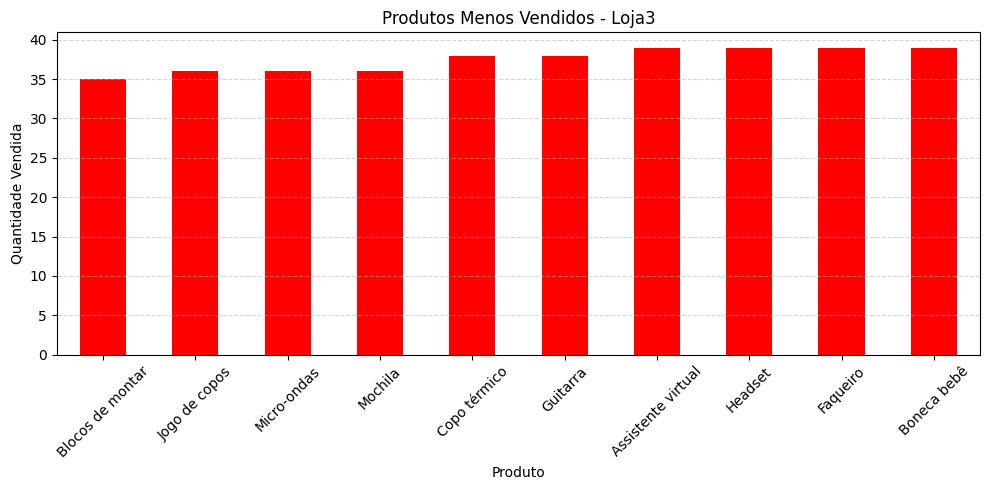


🔹 Loja4
Produto mais vendido: Cama box (Quantidade: 62)
Produto menos vendido: Guitarra (Quantidade: 33)


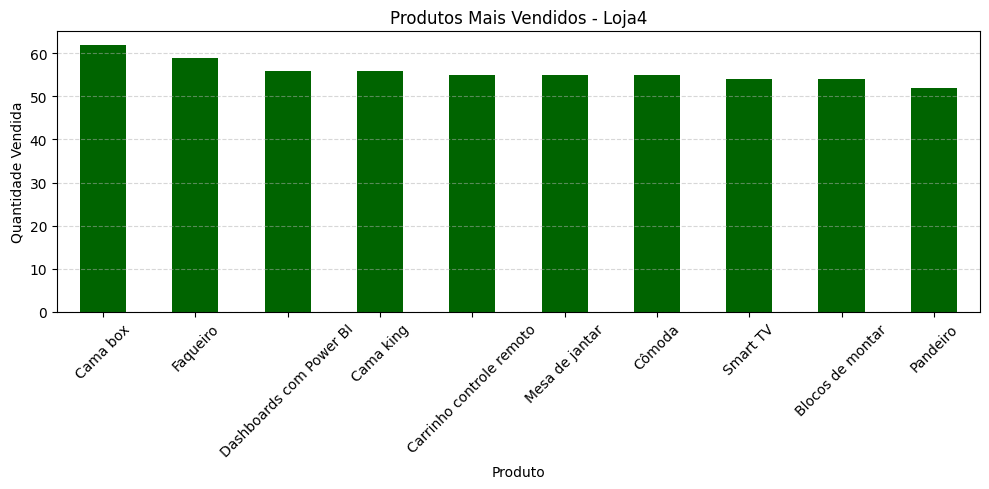

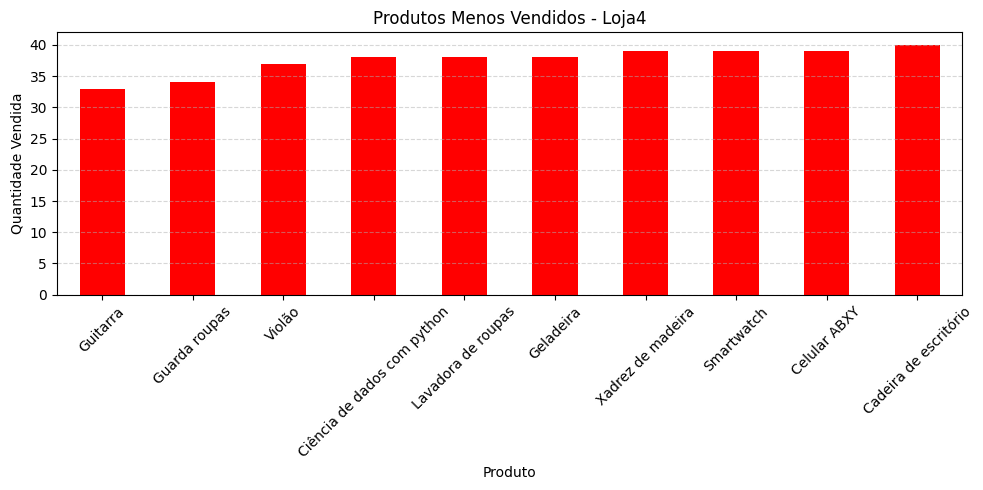

In [9]:
# Identificando produtos mais e menos vendidos por loja
print("\nProdutos mais e menos vendidos por loja:")

for loja, df in dados_lojas.items():
    if 'produto' in df.columns:
        vendas_produtos = df['produto'].value_counts()

        mais_vendido = vendas_produtos.idxmax()
        menos_vendido = vendas_produtos.idxmin()

        print(f"\n🔹 {loja}")
        print(f"Produto mais vendido: {mais_vendido} (Quantidade: {vendas_produtos.max()})")
        print(f"Produto menos vendido: {menos_vendido} (Quantidade: {vendas_produtos.min()})")

        # Visualização das vendas por produto
        plt.figure(figsize=(10, 5))
        vendas_produtos.head(10).plot(kind='bar', color='darkgreen')
        plt.title(f'Produtos Mais Vendidos - {loja}')
        plt.xlabel('Produto')
        plt.ylabel('Quantidade Vendida')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

         # Gráfico: Produtos menos vendidos
        plt.figure(figsize=(10, 5))
        vendas_produtos.tail(10).sort_values().plot(kind='bar', color='red')
        plt.title(f'Produtos Menos Vendidos - {loja}')
        plt.xlabel('Produto')
        plt.ylabel('Quantidade Vendida')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

# 5. Frete Médio por Loja


<ipython-input-10-abd91daa47d6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(fretes_ordenados.keys()), y=list(fretes_ordenados.values()), palette='Blues')


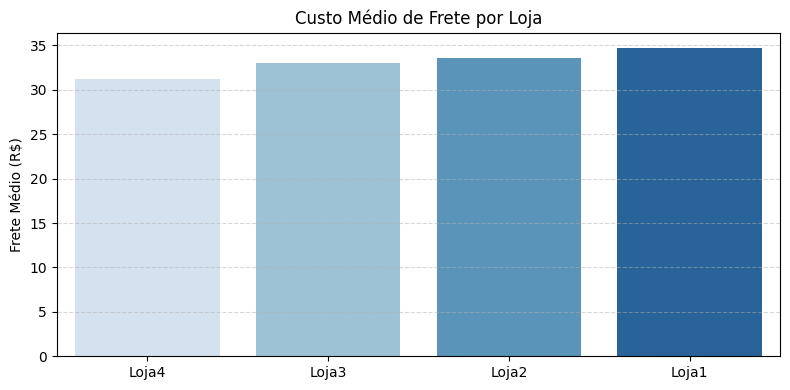

In [10]:
# Gráfico de comparação do frete médio por loja
fretes_medios = {
    loja: df['frete'].dropna().mean()
    for loja, df in dados_lojas.items() if 'frete' in df.columns
}

if fretes_medios:
    plt.figure(figsize=(8, 4))
    fretes_ordenados = dict(sorted(fretes_medios.items(), key=lambda item: item[1]))
    sns.barplot(x=list(fretes_ordenados.keys()), y=list(fretes_ordenados.values()), palette='Blues')
    plt.title("Custo Médio de Frete por Loja")
    plt.ylabel("Frete Médio (R$)")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



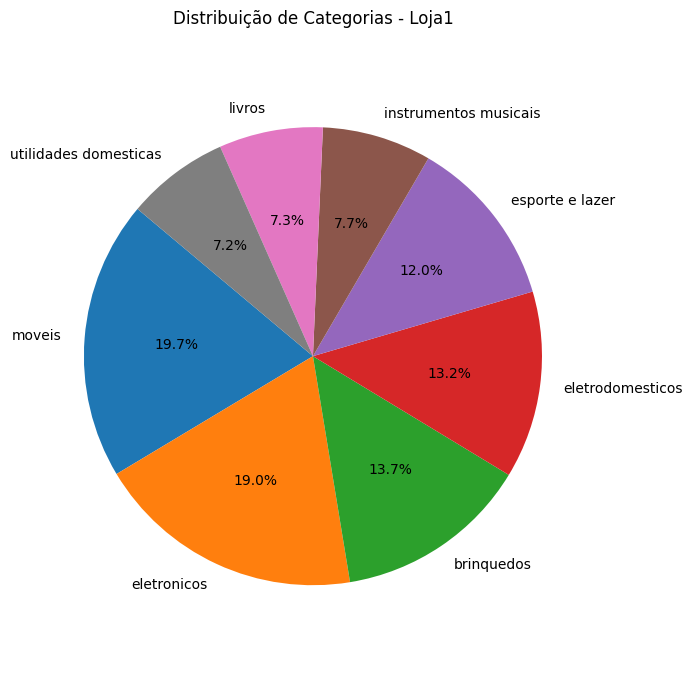

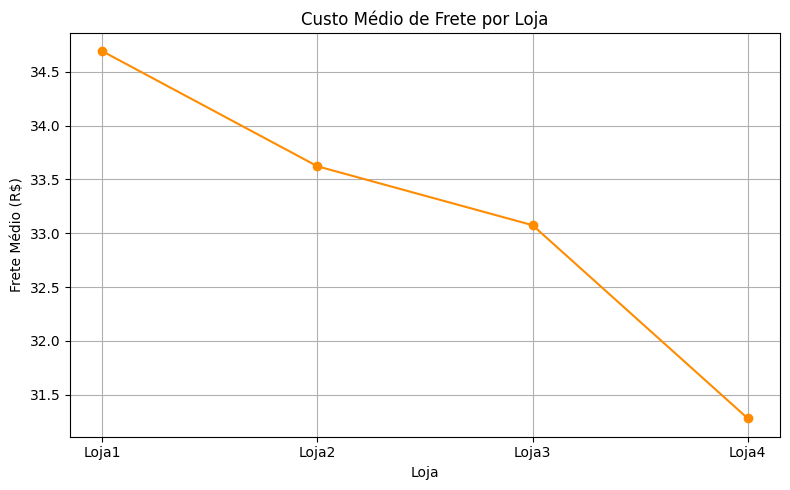

In [11]:
# Gráfico de Pizza: Distribuição de categorias da Loja1
if 'categoria_do_produto' in dados_lojas['Loja1'].columns:
    categorias = dados_lojas['Loja1']['categoria_do_produto'].value_counts()
    plt.figure(figsize=(7, 7))
    plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribuição de Categorias - Loja1')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Gráfico de Linhas: Custo médio de frete por loja
fretes_medios = {
    loja: df['frete'].mean()
    for loja, df in dados_lojas.items() if 'frete' in df.columns
}

plt.figure(figsize=(8, 5))
plt.plot(list(fretes_medios.keys()), list(fretes_medios.values()), marker='o', linestyle='-', color='darkorange')
plt.title('Custo Médio de Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

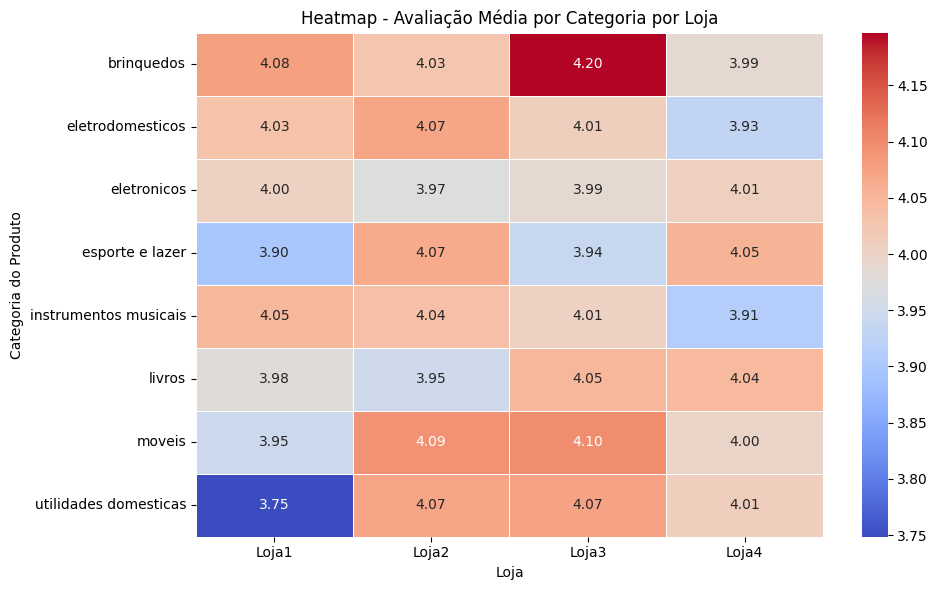

In [12]:
# Heatmap: Avaliação Média por Categoria por Loja

# Criar dicionário para armazenar as médias por categoria
avaliacoes_categoria_loja = {}

for loja, df in dados_lojas.items():
    if 'avaliacao_da_compra' in df.columns and 'categoria_do_produto' in df.columns:
        medias = df.groupby('categoria_do_produto')['avaliacao_da_compra'].mean()
        avaliacoes_categoria_loja[loja] = medias

# Combinar tudo em um único DataFrame
df_heatmap = pd.DataFrame(avaliacoes_categoria_loja)

# Preencher valores ausentes com 0 ou outro valor (ex: np.nan)
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap - Avaliação Média por Categoria por Loja')
plt.xlabel('Loja')
plt.ylabel('Categoria do Produto')
plt.tight_layout()
plt.show()

Relatório Final – Análise das Lojas do Senhor João

O objetivo desta análise foi auxiliar o Senhor João na tomada de decisão sobre qual loja vender. Para isso, realizamos um estudo completo com base nos dados fornecidos das quatro lojas: Loja1, Loja2, Loja3 e Loja4.

As análises consideraram os seguintes critérios:

Faturamento total por loja.

Categorias de produtos mais e menos vendidas.

Avaliações médias dos clientes.

Produtos com maior e menor volume de vendas.

Custo médio de frete por loja.

As conclusões foram apoiadas por gráficos que destacam os principais padrões encontrados nos dados.


Faturamento Total por Loja

Através da análise do faturamento, identificamos que a Loja2 e a Loja4 se destacam com os maiores valores de vendas totais. A Loja3 apresenta o menor desempenho financeiro.


Categorias Mais e Menos Vendidas

As categorias mais vendidas variam entre as lojas, mas Eletrodomésticos e Informática aparecem frequentemente entre os destaques.

As menos vendidas incluem Livros, Games e Beleza, dependendo da loja.


Avaliação dos Clientes

As avaliações médias revelam a percepção dos consumidores:

Loja1 e Loja3 apresentam as melhores avaliações.

Loja2, apesar do bom faturamento, possui uma avaliação inferior, o que pode indicar problemas com atendimento, qualidade ou logística.


Produtos Mais e Menos Vendidos

Produtos mais vendidos: Itens de tecnologia e utilidades domésticas dominam as vendas em todas as lojas.

Produtos menos vendidos: Há uma concentração de produtos de nicho ou baixo giro, como acessórios ou itens sazonais.

Frete Médio por Loja

A Loja4 apresenta o maior custo médio de frete, o que pode impactar na margem de lucro.

A Loja1 e a Loja3 possuem fretes mais econômicos, o que é vantajoso para a sustentabilidade do negócio.


Conclusão e Recomendação

Com base em todas as análises, recomendamos que o Senhor João venda a Loja2. Motivos:

Pontos fortes da Loja2:

Maior faturamento total entre todas as lojas.

Ampla variedade de produtos vendidos, com bom desempenho nas categorias principais.

Pontos de atenção:

A avaliação dos clientes é mais baixa, o que exige melhorias no atendimento ou entrega.

O frete médio é razoável, mas pode ser otimizado.

Se o foco do Senhor João for maximizar o valor da venda, a Loja2 é a mais lucrativa. No entanto, se ele busca manter a reputação e experiência positiva do cliente, a Loja1 é uma boa alternativa, por ter boas avaliações, menor frete e vendas consistentes.